In [11]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [75]:
api = wandb.Api()

In [76]:
td3_run_names = [
    "kilian/DRL-Traj-Planner/82lwb7j1",
    "kilian/DRL-Traj-Planner/6zvdn2pi",
    "kilian/DRL-Traj-Planner/vn6gde0b",
    "kilian/DRL-Traj-Planner/kopehf1h",
    "kilian/DRL-Traj-Planner/7vuaanvi",
    "kilian/DRL-Traj-Planner/lbkr89le"
]

ppo_run_names = [
    "kilian/DRL-Traj-Planner/nko6ypj7",
    "kilian/DRL-Traj-Planner/db4eayza",
    "kilian/DRL-Traj-Planner/xor1mypg",
    "kilian/DRL-Traj-Planner/n2670xjz",
    "kilian/DRL-Traj-Planner/hhva37ud",
    "kilian/DRL-Traj-Planner/c2fde4xi",
]

In [85]:
def extract_results(run_names):
    results = defaultdict(list)
    results_pt = defaultdict(list)
    
    for run_name in run_names:
        run = api.run(run_name)
        hist = run.history(samples=100_000)
        succ = hist["train/episode_success"].dropna().values
        
        if "pretrained" in run.tags:
            print(run_name)
            results_pt["success"].append(succ)
        else:
            results["success"].append(succ)
            
    pt_success = np.stack(results_pt["success"]).mean(axis=0)
    success = np.stack(results["success"]).mean(axis=0)
    return success, pt_success

In [86]:
td3_success, td3_pt_success = extract_results(td3_run_names)

kilian/DRL-Traj-Planner/6zvdn2pi
kilian/DRL-Traj-Planner/kopehf1h
kilian/DRL-Traj-Planner/lbkr89le


In [77]:
ppo_success, ppo_pt_success = extract_results(ppo_run_names)

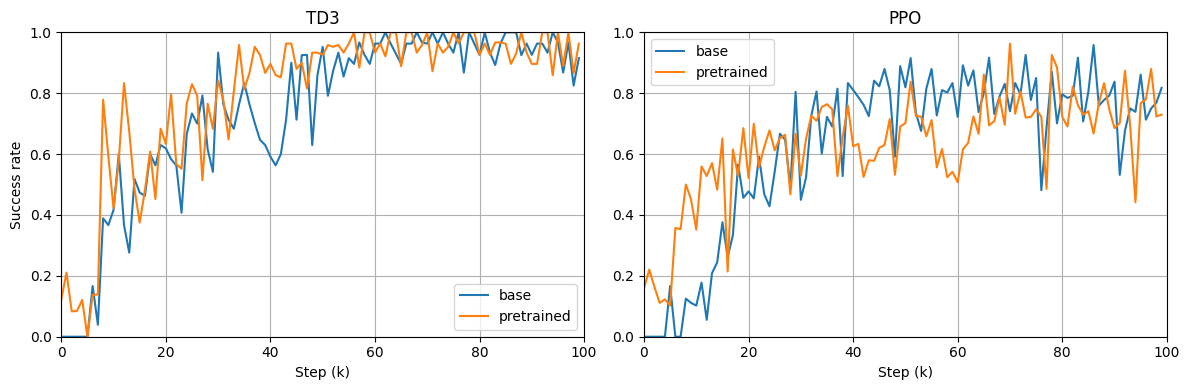

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i, (succ, pt_succ) in enumerate(zip([td3_success, ppo_success], [td3_pt_success, ppo_pt_success])):
    axs[i].plot(succ, label="base")
    axs[i].plot(pt_succ, label="pretrained")
    axs[i].grid()
    axs[i].set_xlim([0, 100])
    axs[i].set_ylim([0, 1])
    axs[i].legend()

axs[0].set_title("TD3")
axs[1].set_title("PPO")
axs[0].set_xlabel("Step (k)")
axs[1].set_xlabel("Step (k)")
axs[0].set_ylabel("Success rate")
plt.tight_layout()
plt.show()